In [5]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
import SLEEPY as sl
import numpy as np

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


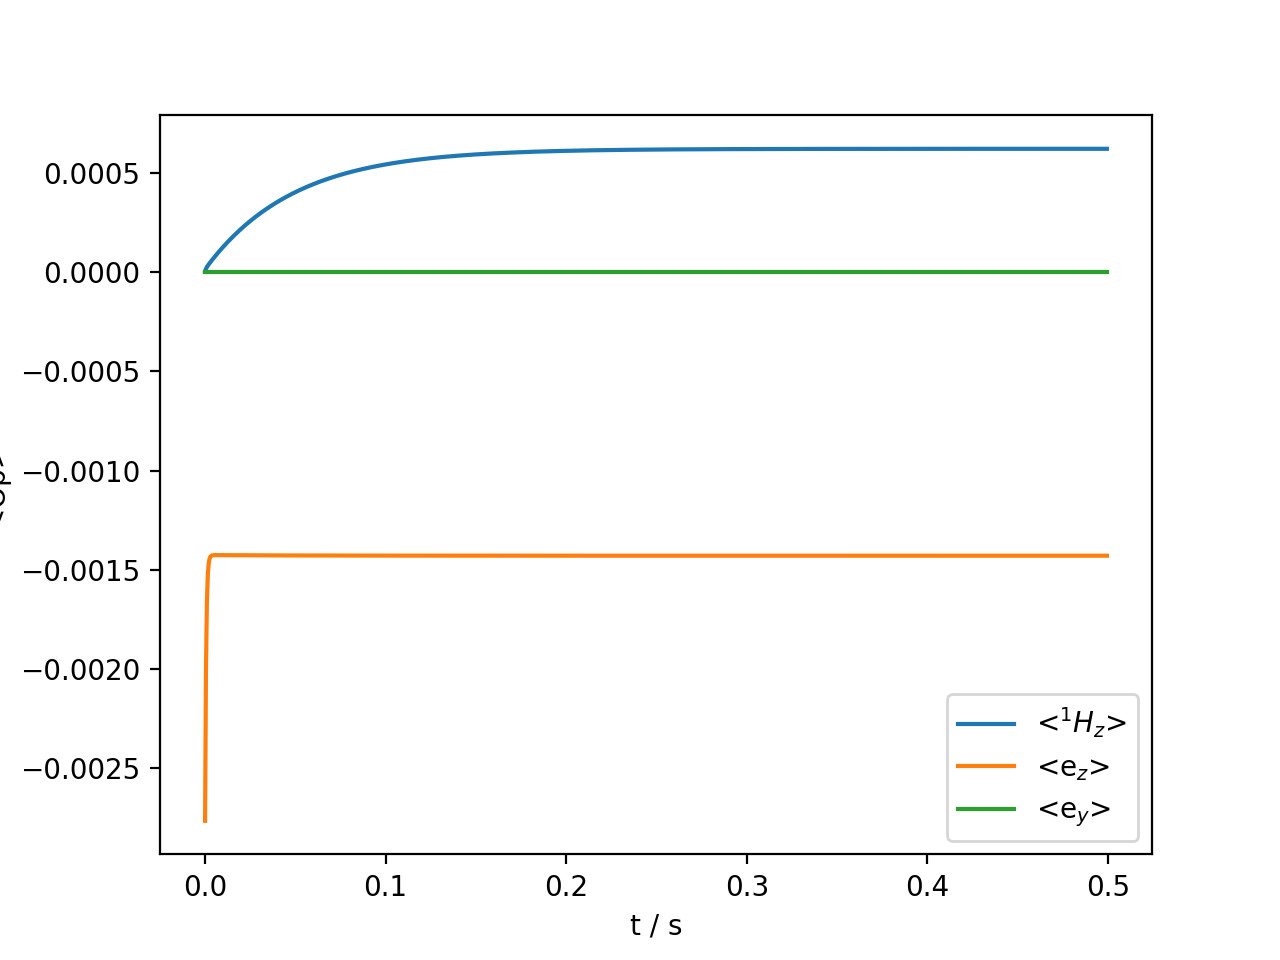

<AxesSubplot:xlabel='t / s', ylabel='<Op>'>

In [70]:
ex=sl.ExpSys(v0H=14,Nucs=['1H','e'],vr=0,LF=[True,False],T_K=80,pwdavg=sl.PowderAvg()[10])
ex.set_inter('hyperfine',i0=0,i1=1,Axx=-1e4,Ayy=-1e4,Azz=2e4)

L=ex.Liouvillian()
L.add_relax('T1',i=0,T1=.1,OS=True,Thermal=True)
L.add_relax('T2',i=0,T2=.005,OS=True)
L.add_relax('T1',i=1,T1=.0014,OS=True,Thermal=True)
L.add_relax('T2',i=1,T2=10e-6,OS=True)

v1=14e6
pi2=1/v1/4
SL=5e-6
RD=.5e-3

seq=L.Sequence().add_channel('e',t=[0,pi2,pi2+SL,2*pi2+SL,RD],v1=[v1,v1,v1,0],phase=[0,np.pi/2,np.pi,0])

rho=sl.Rho('Thermal',['1Hz','ez','ey'])
rho.DetProp(seq,n=1000)

rho.plot(axis='s')

In [48]:
rho.I[0][-1]/ex.Peq[0]

(55.02222061376163-1.8661921170250732e-10j)

Prop: 1000 steps per every 1 rotor period


<IPython.core.display.Javascript object>


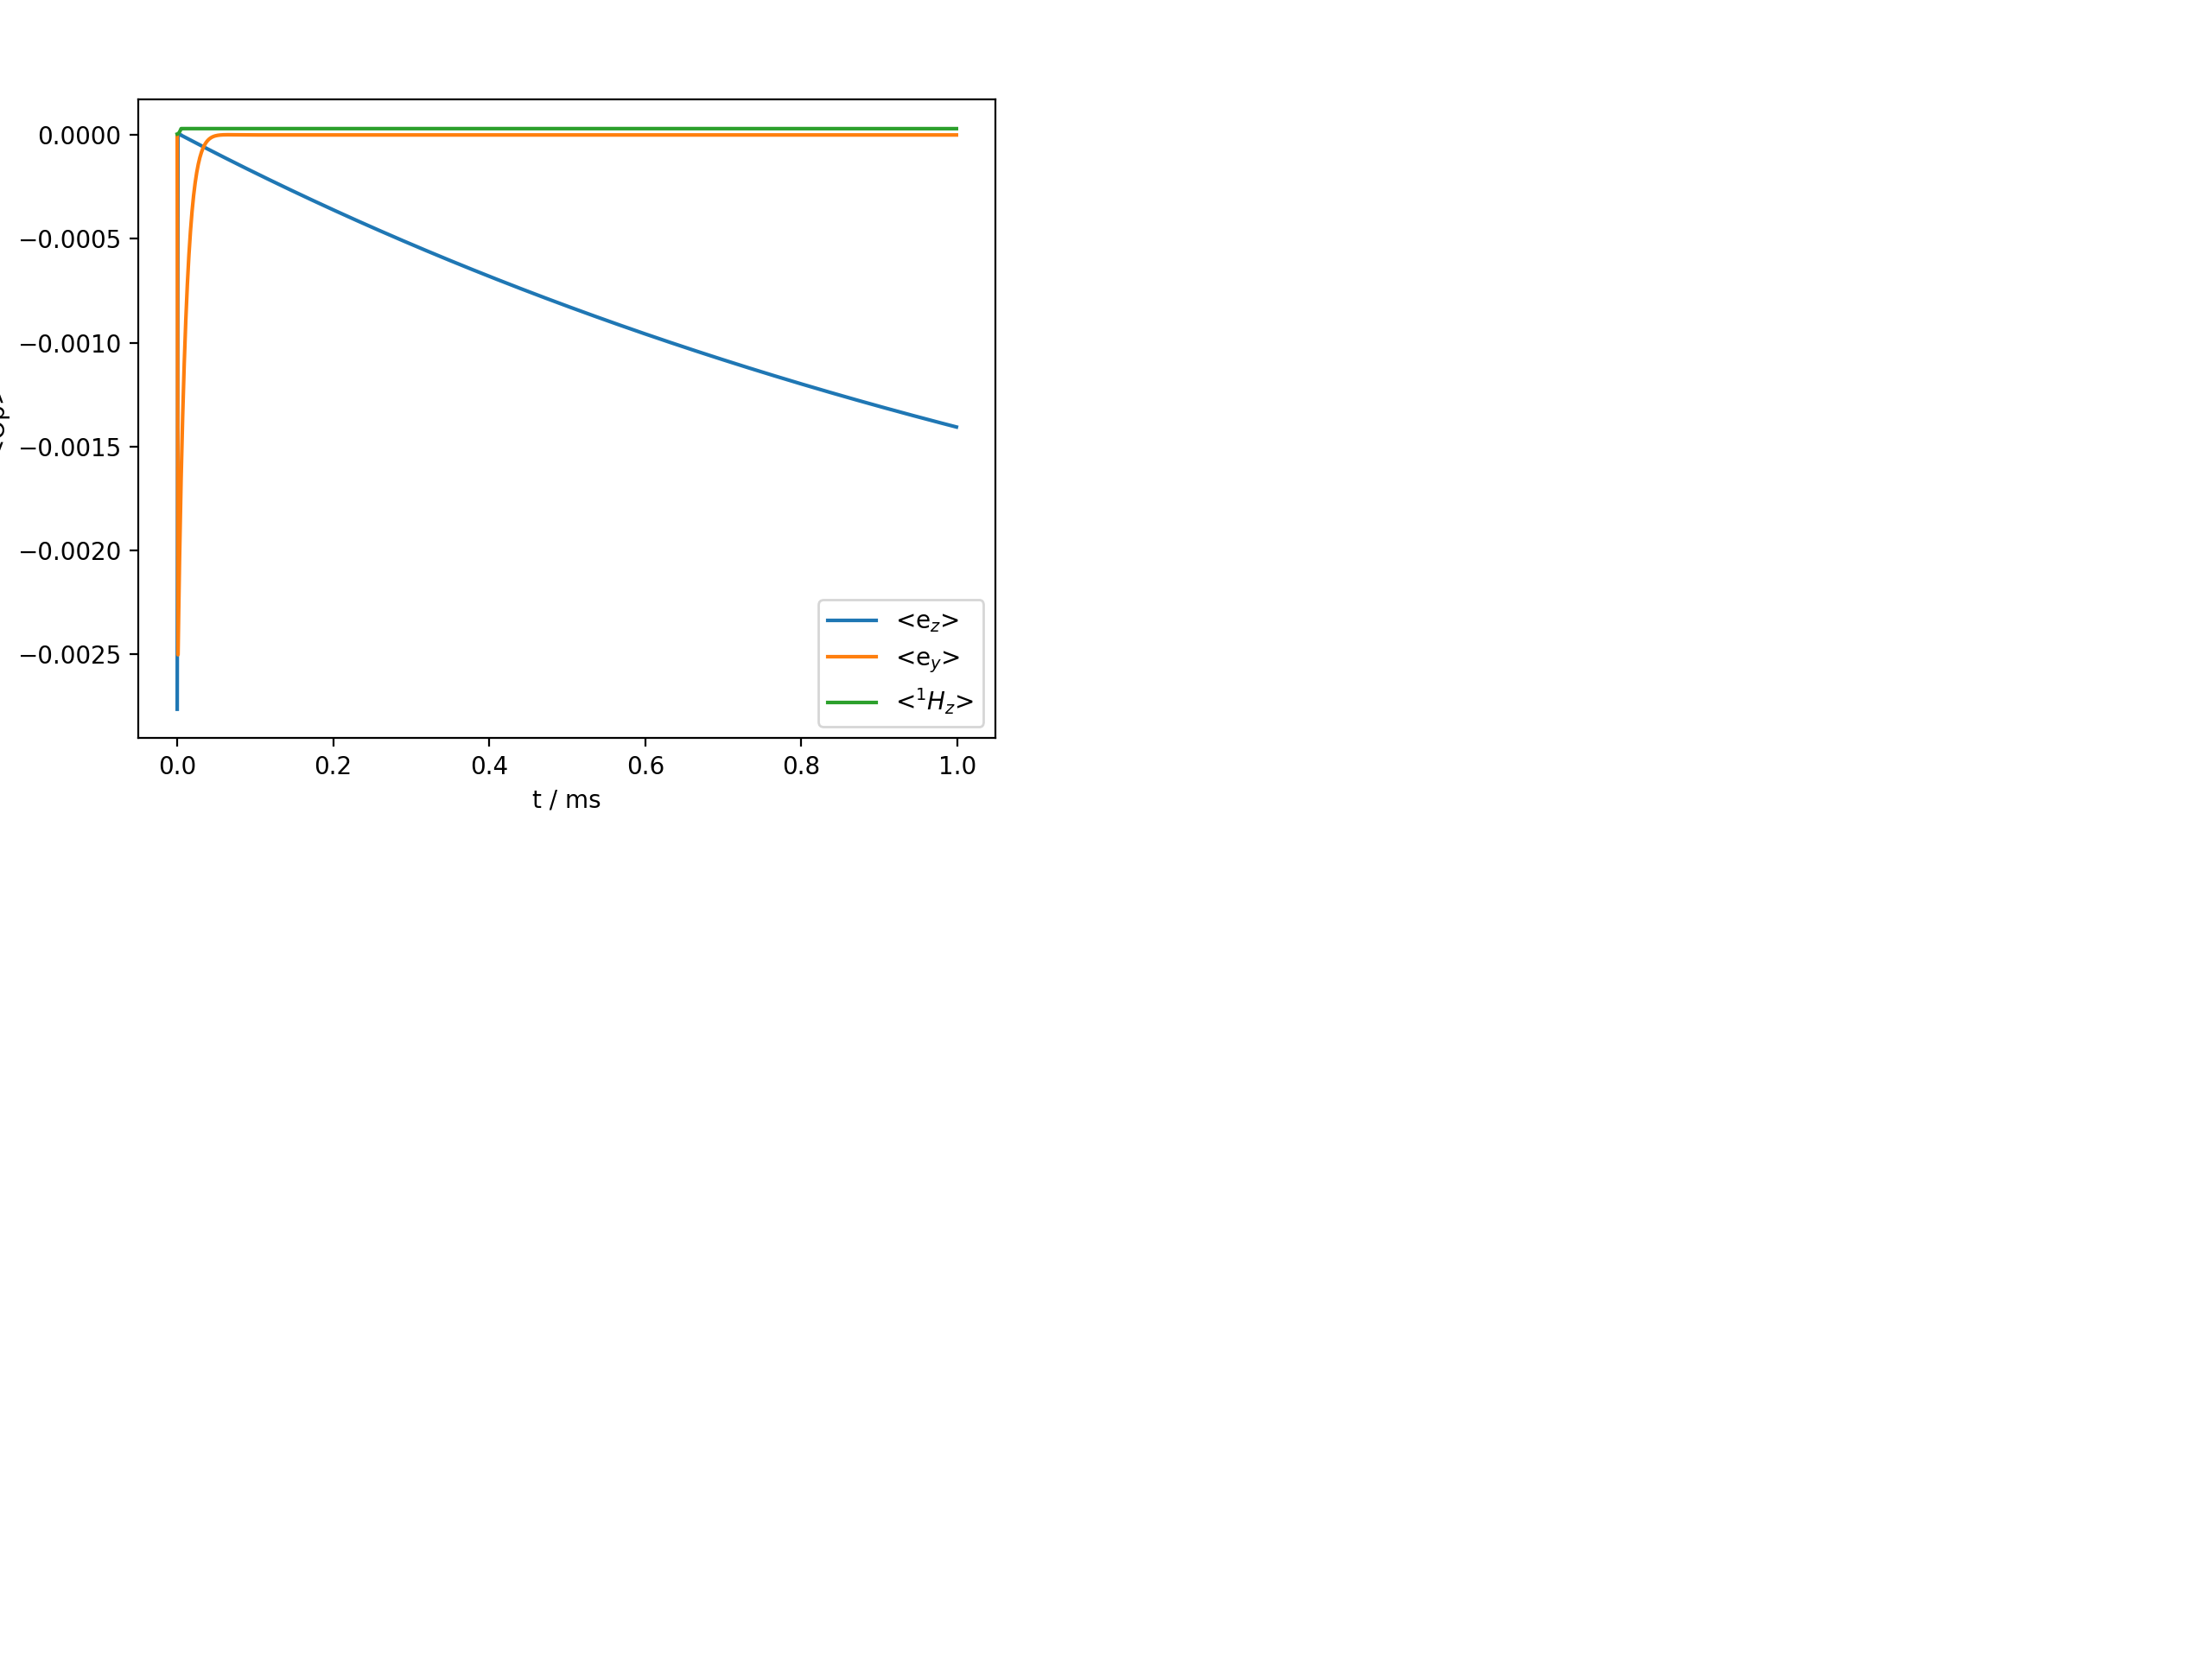

<AxesSubplot:xlabel='t / ms', ylabel='<Op>'>

In [41]:
ex=sl.ExpSys(v0H=14,Nucs=['1H','e'],vr=1000,LF=[True,False],T_K=80,pwdavg=sl.PowderAvg()[10])
ex.set_inter('hyperfine',i0=0,i1=1,Axx=-1e4,Ayy=-1e4,Azz=2e4)

L=ex.Liouvillian()
L.add_relax('T1',i=0,T1=.1,OS=True,Thermal=True)
L.add_relax('T2',i=0,T2=.005,OS=True)
L.add_relax('T1',i=1,T1=.0014,OS=True,Thermal=True)
L.add_relax('T2',i=1,T2=10e-6,OS=True)

v1=14e6
pi2=1/v1/4
SL=5e-6
RD=L.taur-SL-pi2

seq=L.Sequence().add_channel('e',t=[0,pi2,pi2+SL,pi2+SL+RD],v1=[v1,v1,0],phase=[0,np.pi/2,0])

rho=sl.Rho('Thermal',['ez','ey','1Hz'])
rho.DetProp(seq,n=1000,n_per_seq=1000)

rho.plot(axis='ms')

In [18]:
pi2

1.7857142857142856e-08